# **Preprocessing, Feature Engineering, Feature Selection**

In [39]:
import pandas as pd

df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
df = df.loc['2011-01-01':'2024-12-31']

**Lags**

In [40]:
df['Close_lag1'] = df['Close'].shift(1)  # Yesterday’s closing price
df['Close_lag5'] = df['Close'].shift(5)  # Last week's closing price
df['Close_lag22'] = df['Close'].shift(22)  # Last month's closing price
df['Close_lag66'] = df['Close'].shift(66)  # Quarter's closing price

df['Volume_lag1'] = df['Volume'].shift(1)  # Volume from 1 days ago
df['Volume_lag5'] = df['Volume'].shift(5)  # Volume from 5 days ago
df['Volume_lag22'] = df['Volume'].shift(22)  # Volume from 22 days ago
df['Volume_lag66'] = df['Volume'].shift(66)  # Volume from 66 days ago

**Returns**

In [41]:
df['return_1d'] = df['Close'].pct_change()         # Daily return
df['return_5d'] = df['Close'].pct_change(5)        # 5-day return
df['return_22d'] = df['Close'].pct_change(22)      # 22-day return
df['return_66d'] = df['Close'].pct_change(66)      # 66-day return


**Moving Averages**

In [42]:
df['ma_5'] = df['Close'].rolling(window=5).mean()
df['ma_22'] = df['Close'].rolling(window=22).mean()
df['ma_66'] = df['Close'].rolling(window=66).mean()

**Volatility**

In [43]:
df['volatility_5'] = df['Close'].rolling(window=5).std()
df['volatility_22'] = df['Close'].rolling(window=22).std()
df['volatility_66'] = df['Close'].rolling(window=66).std()

**Momentum**

In [44]:
df['momentum_5'] = df['Close'] - df['Close'].shift(5)
df['momentum_22'] = df['Close'] - df['Close'].shift(22)
df['momentum_66'] = df['Close'] - df['Close'].shift(66)

In [45]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_lag1', 'Close_lag5',
       'Close_lag22', 'Close_lag66', 'Volume_lag1', 'Volume_lag5',
       'Volume_lag22', 'Volume_lag66', 'return_1d', 'return_5d', 'return_22d',
       'return_66d', 'ma_5', 'ma_22', 'ma_66', 'volatility_5', 'volatility_22',
       'volatility_66', 'momentum_5', 'momentum_22', 'momentum_66'],
      dtype='object')

In [46]:
df.head()

,Open,High,Low,Close,Volume,Close_lag1,Close_lag5,Close_lag22,Close_lag66,Volume_lag1,...,return_66d,ma_5,ma_22,ma_66,volatility_5,volatility_22,volatility_66,momentum_5,momentum_22,momentum_66
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,9.799679,9.938711,9.775604,9.917947,445138400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,10.004316,10.006121,9.875214,9.969708,309080800,9.917947,NaN,NaN,NaN,445138400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,9.917342,10.061490,9.915837,10.051258,255519600,9.969708,NaN,NaN,NaN,309080800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,10.072931,10.088880,10.018161,10.043139,300428800,10.051258,NaN,NaN,NaN,255519600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,10.050963,10.121984,9.988067,10.115063,311931200,10.043139,NaN,NaN,NaN,300428800.0,...,NaN,10.019423,NaN,NaN,0.076635,NaN,NaN,NaN,NaN,NaN


In [47]:
from sklearn.preprocessing import MinMaxScaler

features = df.drop(columns=['Close'])  # Drop target
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

In [48]:
target.head()

,Close
Date,
2011-01-03,9.917947
2011-01-04,9.969708
2011-01-05,10.051258
2011-01-06,10.043139
2011-01-07,10.115063


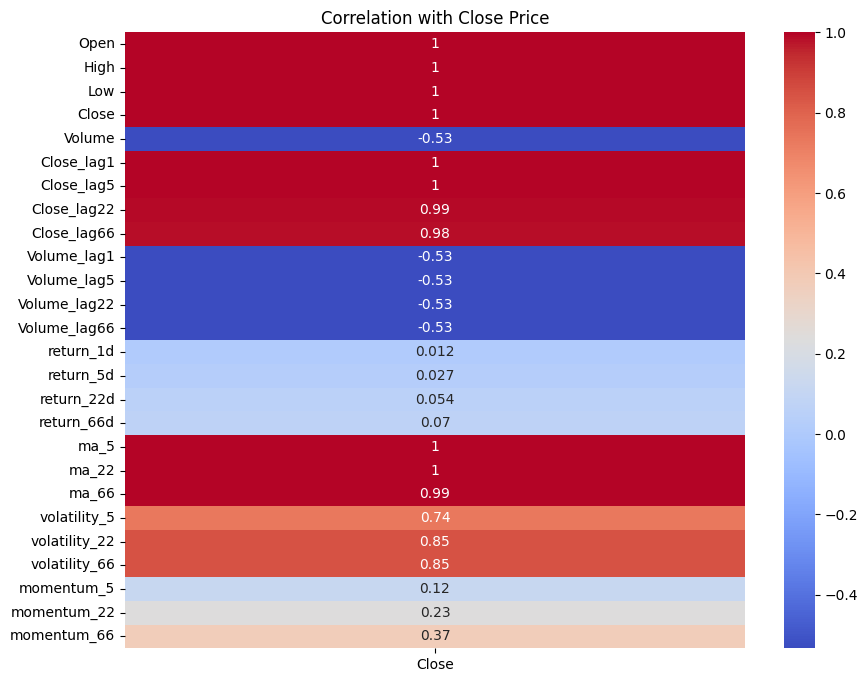

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Close']], annot=True, cmap='coolwarm')
plt.title("Correlation with Close Price")
plt.show()

In [31]:
import numpy as np

def create_sequences(X, y, seq_length=20):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length=20)

In [38]:
y_scaled

array([[0.00172052],
       [0.00192819],
       [0.00225538],
       ...,
       [0.98625373],
       [0.97266767],
       [0.96553398]])

In [49]:
dates = df.index[20:]  # adjust for sequence lag
# The create_sequences function returns NumPy arrays directly.
# We can directly use X_seq and y_seq here after splitting.

In [50]:
# The create_sequences function now returns NumPy arrays directly.
# We can directly use X_seq and y_seq here after splitting.
dates = df.index[20:]  # adjust for sequence lag

# Get the indices for the train and test sets
train_start_date = '2012-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2015-12-31'

# Find the indices corresponding to the dates in the original dataframe's index
train_start_idx = dates.get_indexer([train_start_date], method='nearest')[0]
train_end_idx = dates.get_indexer([train_end_date], method='nearest')[0]
test_start_idx = dates.get_indexer([test_start_date], method='nearest')[0]
test_end_idx = dates.get_indexer([test_end_date], method='nearest')[0]


X_train = X_seq[train_start_idx:train_end_idx+1]
y_train = y_seq[train_start_idx:train_end_idx+1]
X_test = X_seq[test_start_idx:test_end_idx+1]
y_test = y_seq[test_start_idx:test_end_idx+1]

# Ensure float32 dtype
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [51]:
df.head()

,Open,High,Low,Close,Volume,Close_lag1,Close_lag5,Close_lag22,Close_lag66,Volume_lag1,...,return_66d,ma_5,ma_22,ma_66,volatility_5,volatility_22,volatility_66,momentum_5,momentum_22,momentum_66
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,9.799679,9.938711,9.775604,9.917947,445138400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,10.004316,10.006121,9.875214,9.969708,309080800,9.917947,NaN,NaN,NaN,445138400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,9.917342,10.061490,9.915837,10.051258,255519600,9.969708,NaN,NaN,NaN,309080800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,10.072931,10.088880,10.018161,10.043139,300428800,10.051258,NaN,NaN,NaN,255519600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,10.050963,10.121984,9.988067,10.115063,311931200,10.043139,NaN,NaN,NaN,300428800.0,...,NaN,10.019423,NaN,NaN,0.076635,NaN,NaN,NaN,NaN,NaN


# Daily:

X_train shape: (754, 20, 25)
y_train shape: (754, 1)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0076 - val_loss: 1.3643e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020 - val_loss: 1.3898e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 4.9576e-05
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4417e-04 - val_loss: 6.4651e-05
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.3522e-04 - val_loss: 2.5052e-05
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0223e-04 - val_loss: 2.2840e-05
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9025e-04 - val_loss: 1.0402e-05
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.7467e-04 - val_loss: 1.1502e-05
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9608e-04 - val_loss: 3.2554e-05
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3173e-04 - val_loss: 1.1139e-05
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7255e-04 - val_loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Test RMSE: 0.0051
Test MAE:  0.0040
Test R2:   0.4260


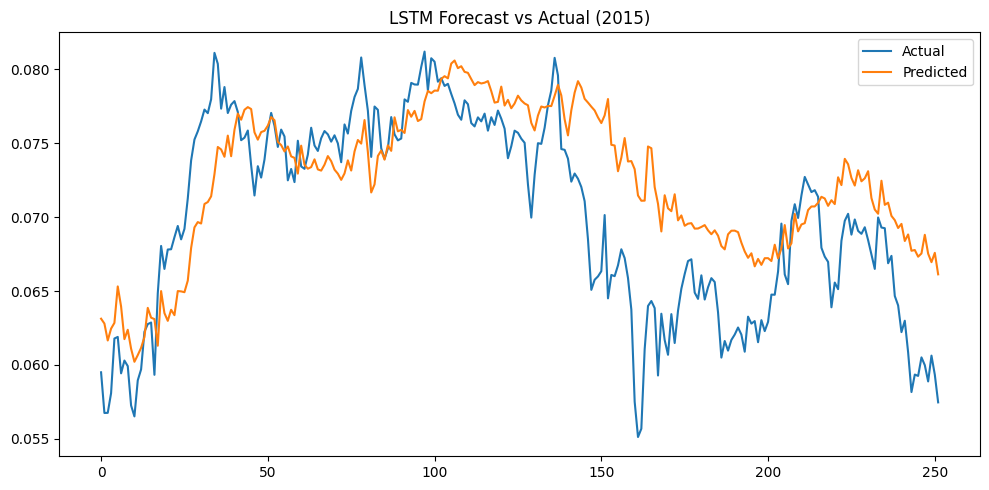

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Check shape: (samples, timesteps, features)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# -------------------------------
# Define LSTM Model
# -------------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# -------------------------------
# Train
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# Evaluate on Test Set
# -------------------------------
y_pred = model.predict(X_test).flatten()

# Inverse-transform if needed (you mentioned it's normalized — keep in mind for MAE, etc.)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test R2:   {r2:.4f}")

# -------------------------------
# Plot Forecast vs Actual
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("LSTM Forecast vs Actual (2015)")
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
# -------------------------------
# Recursive 5-Day Forecast
# -------------------------------

forecast_horizon = 5
step_size = 5

X_input = X_test.copy()  # shape: (samples, timesteps, features)
true_values = y_test.copy()

recursive_preds = []
actuals = []
start_indices = range(0, len(X_input) - forecast_horizon, step_size)

for i in start_indices:
    x_seq = X_input[i].copy()  # shape: (timesteps, features)
    pred_sequence = []

    for _ in range(forecast_horizon):
        # Reshape input to (1, timesteps, features)
        input_reshaped = x_seq.reshape(1, x_seq.shape[0], x_seq.shape[1])

        # Predict next step
        next_pred = model.predict(input_reshaped, verbose=0)[0, 0]
        pred_sequence.append(next_pred)

        # Update input sequence with predicted value
        x_seq = np.append(x_seq[1:], [[next_pred]], axis=0)

    # Store predictions and actuals
    recursive_preds.extend(pred_sequence)
    actuals.extend(true_values[i:i+forecast_horizon])

# -------------------------------
# Evaluation
# -------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(actuals, recursive_preds))
mae = mean_absolute_error(actuals, recursive_preds)
r2 = r2_score(actuals, recursive_preds)

print(f"\nRecursive 5-Day Forecast Metrics:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R2:   {r2:.4f}")

# -------------------------------
# Plot Forecast vs Actual
# -------------------------------

plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual')
plt.plot(recursive_preds, label='Recursive 5-Day Forecast', alpha=0.7)
plt.title("Recursive LSTM 5-Day Forecasts")
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.legend()
plt.tight_layout()
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 25 and the array at index 1 has size 1

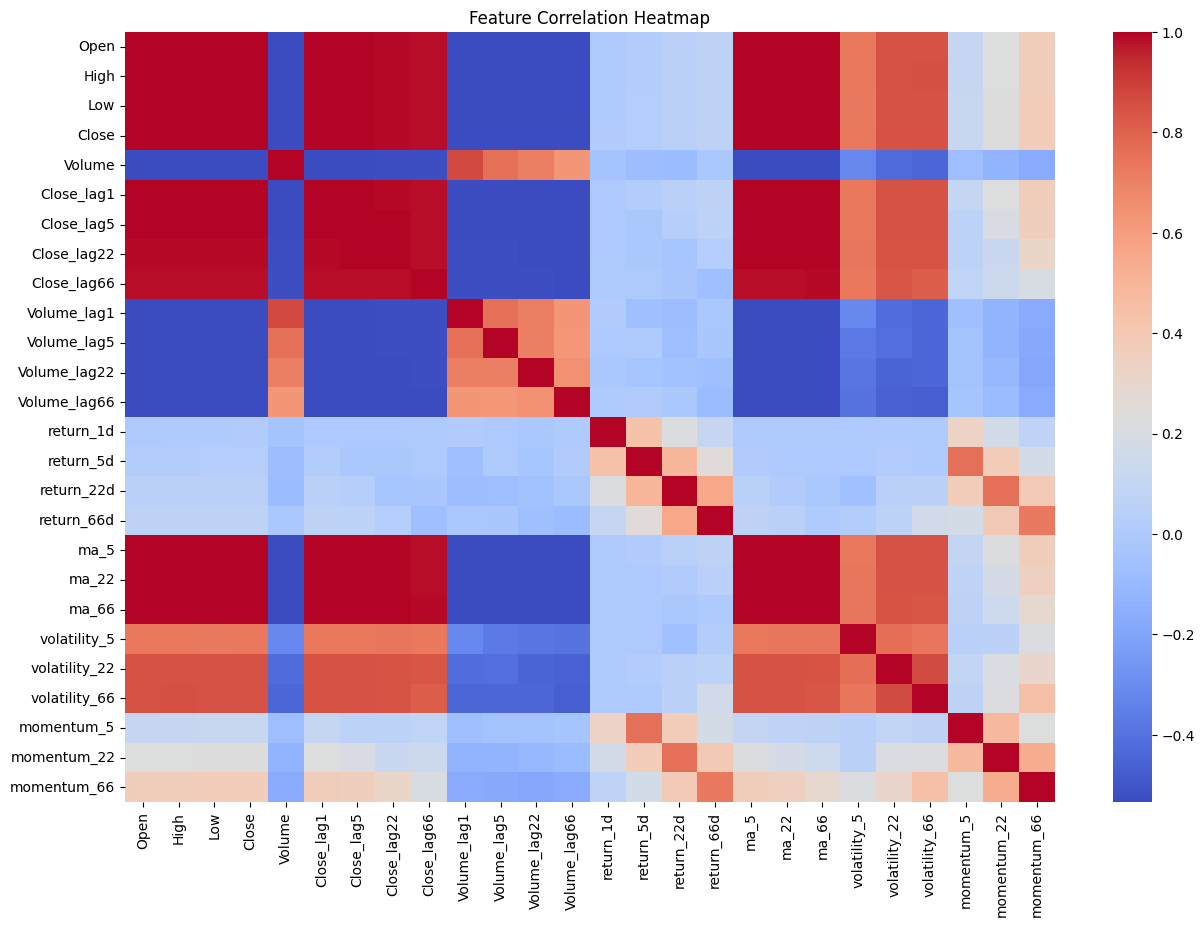

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features = df.drop(columns=['Close']).dropna()
target = df['Close'].shift(-1).dropna()
aligned_index = features.index.intersection(target.index)
X = features.loc[aligned_index]
y = target.loc[aligned_index]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=False, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))


Low              0.314136
High             0.220908
ma_5             0.145706
Open             0.143530
Close_lag1       0.136688
ma_22            0.022188
Close_lag5       0.008457
ma_66            0.007505
Close_lag22      0.000203
Close_lag66      0.000167
return_1d        0.000054
volatility_22    0.000043
volatility_66    0.000042
Volume_lag5      0.000042
Volume_lag66     0.000042
Volume_lag22     0.000041
volatility_5     0.000036
Volume           0.000034
momentum_5       0.000031
Volume_lag1      0.000030
dtype: float64
